# EXPLORATORY DATA ANALYSIS:TITANIC DATASET

**SHAPE AI_AUTHOR:KOMAL JANGRA**

In [396]:
# Problem Statement to check whether or not a passenger survived or not

In [425]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [398]:
import warnings
warnings.filterwarnings('ignore')

In [399]:
# Importing csv file of the data

df = pd.read_csv('train (1).csv')

In [400]:
# To read the data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
# To check the shape of the data

df.shape

(891, 12)

In [402]:
# To check the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [403]:
# To check the columns of the dataset

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [404]:
# To check the missing values of the dataset

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**So this shows there are 177 missing values in age column , 687 in Cabin column and 2 in Embarked column.**

**Since there are 687 missing values in Cabin column out of 891 , which is a like a big proportion of Data is missing ,therefore We ll drop the column for further analysis**

In [426]:
# Let's work on the missing values first

df = df.drop(['Cabin'], axis=1)

KeyError: "['Cabin'] not found in axis"

In [427]:
df.shape

(891, 10)

In [407]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [428]:
# Trying to fill the null values in Age column by checking the relation with Pclass column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

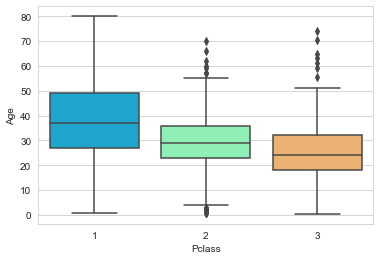

In [408]:
plt.figure
sns.boxplot(x ='Pclass' , y ='Age' ,  data=df, palette = 'rainbow')

In [429]:
# Definig the function to fill the null values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [430]:
# Now apply the function

df['Age'] = df[['Age','Pclass']].apply(impute_age , axis =1)

In [431]:
df.fillna(df.mean() , inplace =True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [432]:
# Trying to check the frequently occuring vakdf.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [433]:
df['Embarked'].fillna('S',inplace =True)

In [434]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [415]:
#Now we will check the aggregate functions of the Dataset


df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [416]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


Out of 891 62 People died in accident


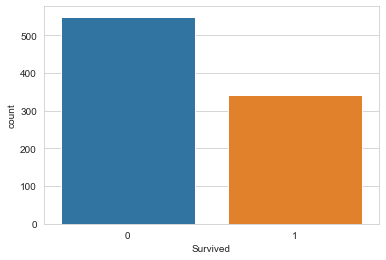

In [417]:
sns.countplot(df['Survived'])
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print('Out of 891 {} People died in accident'.format(death_percent))

**So out of 891  69 people died**

<AxesSubplot:xlabel='Survived', ylabel='count'>

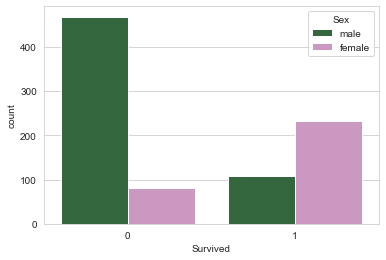

In [435]:
# To check the survival Ratio of male and Female
sns.set_style('whitegrid')
sns.countplot(x= 'Survived' ,hue ='Sex' , data= df ,palette = 'cubehelix')

**This shows that Male died more as compared to female**

<AxesSubplot:xlabel='Survived', ylabel='count'>

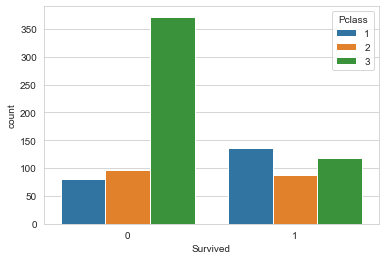

In [436]:
# To check the survival ratio by Class sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass' , data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

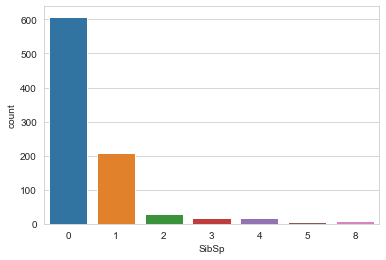

In [420]:
sns.countplot(x ='SibSp', data =df)

<AxesSubplot:>

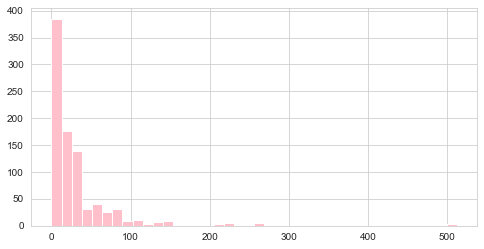

In [421]:
df['Fare'].hist(color = 'pink',bins = 40 , figsize = (8,4))

In [422]:
df['Family_size'] = df['Parch']+df['SibSp']
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_size'],
      dtype='object')

In [423]:
df.drop(['Parch' , 'SibSp'], axis = 1,inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family_size'],
      dtype='object')

CONCLUSION:
* In total 62% people died in the accident.
* Female Survival Ratio was greater as compared to Male.
* Passenger  died in accident was more in Pclass 3.
* The Average age of Pclass 1 is 37years.
* The Average age of Pclass 2 is 29years.
* The Average age of Pclass 3 is 24years.